In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train, y_train),(X_test, y_test)=datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 765s 4us/step


(50000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

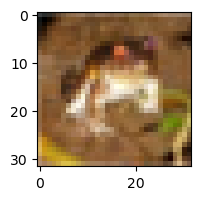

In [10]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])

In [11]:
y_train.shape

(50000, 1)

In [12]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [13]:
 #to reshape
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [14]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
classes[0]

'airplane'

In [17]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

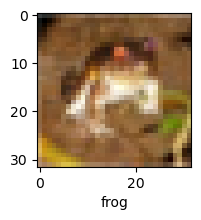

In [18]:
plot_sample(X_train, y_train, 0)

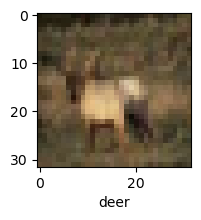

In [20]:
plot_sample(X_train, y_train, 3)

In [24]:
X_train = X_train/255
X_test = X_test/255

In [25]:
## Using ann to first train the model

ann= models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10,activation ='sigmoid')
])
ann.compile(optimizer = 'SGD',
            loss= 'sparse_categorical_crossentropy',
            metrics= ['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 114s 72ms/step - loss: 1.8085 - accuracy: 0.3572
Epoch 2/5
1563/1563 [==============================] - 110s 71ms/step - loss: 1.6227 - accuracy: 0.4275
Epoch 3/5
1563/1563 [==============================] - 113s 72ms/step - loss: 1.5426 - accuracy: 0.4568
Epoch 4/5
1563/1563 [==============================] - 108s 69ms/step - loss: 1.4804 - accuracy: 0.4788
Epoch 5/5
1563/1563 [==============================] - 202s 129ms/step - loss: 1.4323 - accuracy: 0.4976


In [26]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 5s 14ms/step - loss: 1.4634 - accuracy: 0.4805


[1.4633762836456299, 0.4805000126361847]

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classifictaion Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 4s 12ms/step
Classifictaion Report: 
               precision    recall  f1-score   support

           0       0.47      0.62      0.53      1000
           1       0.65      0.57      0.61      1000
           2       0.41      0.31      0.35      1000
           3       0.30      0.44      0.36      1000
           4       0.59      0.22      0.32      1000
           5       0.34      0.44      0.39      1000
           6       0.56      0.50      0.53      1000
           7       0.49      0.64      0.55      1000
           8       0.59      0.64      0.61      1000
           9       0.67      0.43      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.48     10000
weighted avg       0.51      0.48      0.48     10000



In [38]:
## now using cnn
# cnn

cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size =(3,3), activation ='relu', input_shape =(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64, kernel_size =(3,3), activation ='relu', input_shape =(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(64, activation ='relu'),
    layers.Dense(10, activation ='softmax')
])

cnn.compile(optimizer = 'adam',
              loss= 'sparse_categorical_crossentropy',
              metrics =['accuracy'])  

cnn.fit(X_train, y_train, epochs=10)     

Epoch 1/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.4607 - accuracy: 0.4747
Epoch 2/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1085 - accuracy: 0.6124
Epoch 3/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9747 - accuracy: 0.6614
Epoch 4/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.8933 - accuracy: 0.6898
Epoch 5/10
1563/1563 [==============================] - 24s 16ms/step - loss: 0.8300 - accuracy: 0.7101
Epoch 6/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7763 - accuracy: 0.7291
Epoch 7/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7297 - accuracy: 0.7463
Epoch 8/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.6874 - accuracy: 0.7586
Epoch 9/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.6478 - accuracy: 0.7735
Epoch 10/10
1563/1563 [==============================] - 23s 15m

In [39]:
cnn.evaluate(X_test, y_test, 1)

10000/10000 [==============================] - 8s 821us/step - loss: 0.9672 - accuracy: 0.6884


[0.9671673774719238, 0.6883999705314636]

In [37]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

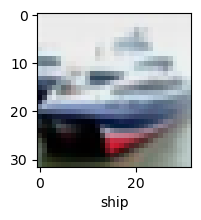

In [40]:
plot_sample(X_test, y_test, 1)

In [41]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 4ms/step


array([[1.7216182e-04, 4.0598097e-05, 3.0905325e-03, 9.4330060e-01,
        4.2155120e-03, 4.3047208e-02, 5.6278048e-04, 2.3151709e-04,
        5.3163809e-03, 2.2739614e-05],
       [2.1824285e-03, 1.4167967e-02, 5.3343797e-06, 1.3522559e-04,
        1.4548009e-07, 1.3758646e-08, 7.7759893e-08, 4.1221792e-08,
        9.8290944e-01, 5.9934473e-04],
       [7.8724876e-02, 6.9506779e-02, 5.7733554e-04, 1.4322612e-02,
        2.5157732e-04, 2.0190491e-04, 2.5473227e-04, 9.6330524e-04,
        7.0233667e-01, 1.3286021e-01],
       [9.1221076e-01, 2.0920415e-04, 1.3294288e-02, 2.6301751e-03,
        9.0752507e-04, 1.2695960e-05, 1.6396312e-05, 6.9818561e-06,
        7.0657484e-02, 5.4391527e-05],
       [1.0845417e-06, 6.0250454e-06, 5.0898446e-03, 1.2336614e-01,
        5.0234032e-01, 3.0123003e-02, 3.3890870e-01, 1.7823417e-05,
        1.4679856e-04, 2.7171399e-07]], dtype=float32)

In [42]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

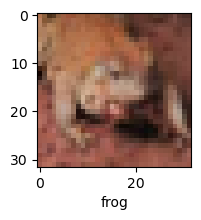

In [49]:
plot_sample(X_test, y_test, 5)

In [50]:
print('Classification Report: \n', classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.73      0.74      1000
           1       0.83      0.76      0.79      1000
           2       0.64      0.54      0.59      1000
           3       0.48      0.59      0.53      1000
           4       0.62      0.66      0.64      1000
           5       0.58      0.59      0.59      1000
           6       0.88      0.60      0.71      1000
           7       0.71      0.78      0.74      1000
           8       0.78      0.82      0.80      1000
           9       0.73      0.81      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

